## Importing Libraries

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os
from matplotlib.ticker import FormatStrFormatter
import sys

## Data for M31 and M33

In [217]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis')

with open('data_m31.pickle', 'rb') as f:
     data_m31 = pickle.load(f)
with open('data_m33.pickle', 'rb') as f:
     data_m33 = pickle.load(f)
kpc_r, dat_sigmatot, dat_sigma, dat_q, dat_omega, dat_sigmasfr, molfrac = data_m31

In [218]:
dp = kpc_r.size

In [219]:
# Defining the Observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
zet = Symbol('zeta')
psi = Symbol('psi')
kalpha = Symbol('K_alpha')

# Defining the general parameters
u = Symbol('u')
tau = Symbol('tau')
l = Symbol('l')
h = Symbol('h')



# Defining the expressions
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
# Ralpha = alphak*h/eta
# Romega = -q*omega*h**2/eta


In [220]:
# a = u.subs({h:1})*h**(1/6)
# h3 = hs.subs({u:a})
# h3

In [221]:
mpc = 1
kpc = 1e+3*mpc
kpcm = 3.086e+21
pcm = kpcm/1e+3
Msun = 1.989e+33
kms = 1e+5
rho = sigma/(2*h)
n = rho/((14/11)*mh)
lsn = 0.14*kpcm*(E51)**Fraction(16, 51) * (n/0.1)**Fraction(-19, 51)*(cs/(kms*10))**Fraction(-1, 3)
l = (3/10)*lsn
l = simplify(l)
nu = (delta*sigmasfr)/(2*h*mstar)
#u = simplify(psi*((4*pi/3)*l*lsn**3*cs**2*nu)**Fraction(1, 3))
hg = zet*(u**2 + cs**2)/(3*pi*G*sigmatot)
hsub = zet*(cs**2)/(3*pi*G*sigmatot)
hsup = zet*(u**2)/(3*pi*G*sigmatot)


In [222]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\libraries' )
def exp_analytical_data(express, ca, rk, data_pass):

    const = [(gamma, 1.5), (boltz, 1.3807e-16), (mh, 1.67e-24), (mu, 14/11), (mach, 1), (G, 6.67e-8),
            (cl, 3/4), (xio, 0.4), (calpha, ca), (Rk, rk), (mstar, 0.85*Msun), (delta, 8e-3), (E51, 1), (kalpha, 1)]
  
    express = express.subs(const).simplify(force=True) 

    exp = np.array([express.evalf(subs={ sigmatot:sigt, sigma: sig, sigmasfr: sigsfr, q:qs, omega: oms, zet:zets, T:t, psi:ps, u : us}) for sigt,sig, sigsfr,qs, oms, zets, t, ps, us in data_pass])

    return exp

In [223]:
Myr = 1e+6*(365*24*60*60)
Uo = 0*kms
f = 3.0
rho = sigma/(2*h)
n = rho/((14/11)*mh)
taue = simplify(l/u)
taur = simplify(6.8*Myr*(1/4)*(nu*kpc**3*Myr/50)**(-1)*(E51)**Fraction(-16, 51) * (n/0.1)**Fraction(19, 17)*(cs/(kms*10)))

Beq = f*u*(4*pi*rho)**Rational(1/2)
biso = (Beq*(xio**(1/2)))/mach
biso = simplify(biso)
biso = biso.powsimp(force=True)

bani = biso*(Rational(1/3)*2*q*omega*tau*(1+(q*omega*tau)/2) + (Uo*tau/l)*(1+1/(1+q*omega*tau)**2))**Rational(1/2)#
bani = simplify(bani)
bani = bani.powsimp(force=True)

Rk = Symbol('R_k')
eta = (1/3)*tau*u**2
alphak1 = calpha*tau**2*u**2*omega/h
alphak2 = calpha*tau*u**2/h
alphak3 = kalpha*u

alphareg = 1
if alphareg == 1:
    alphak = alphak1
elif alphareg == 2:
    alphak = alphak2
else :
    alphak = alphak3
Ralpha = alphak*h/eta
Romega = -q*omega*h**2/eta
Dk = Ralpha*Romega
Dc = -(pi**5)/32
Bbar = (pi*Beq*l*(Rk*(Dk/Dc))**Rational(1/2))/h
Bbar = simplify(Bbar)
#Bbar = Bbar.powsimp(force=True)

tanpB = -((pi**2)*tau*(u**2))/(12*q*omega*(h**2))
tanpB = simplify(tanpB)
tanpB = tanpB.subs([(tau, tau), (l, l)])
tanpB = simplify(tanpB)

tanpb = 1/(1+q*omega*tau)

In [224]:
G_dat_Bord = np.array([4.9, 5.2, 4.9, 4.6])
G_dat_Breg = np.array([1.8, 2.1, 2.6, 2.7])
G_dat_Btot = np.array([7.3, 7.5, 7.1, 6.3])
RM_dat_po = np.array([30, 29, 26, 27, 27])* np.pi/180
err_RM_dat_po = np.array([5, 4, 3, 2, 3])* np.pi/180
rmdat_tanpo = np.tan(RM_dat_po)
rm_errdat_tanpo = 1/(np.cos(err_RM_dat_po))**2
mrange = np.array([(6.8+9.0)/2, (11.3+9.0)/2, (11.3+13.6)/2, (15.8+13.6)/2])

M_dat_pb = np.array([13, 19, 11, 8])* np.pi/180
err_M_dat_pb = np.array([4, 3, 3, 3])* np.pi/180
RM_dat_pb = np.array([4, 9, 7, 7, 5])* np.pi/180
err_RM_dat_pb = np.array([5, 3, 3, 2, 3])* np.pi/180
rmdat_tanpb = np.tan(RM_dat_pb)
rm_errdat_tanpb = 1/(np.cos(err_RM_dat_pb))**2
m_errdat_tanpb = 1/(np.cos(err_M_dat_pb))**2

rmrange = np.arange(7.5,12, 1)
kpc_dat_r = np.array([7, 9, 11, 13])

pc_dat_h = np.array([316.4, 371.9, 437.1, 513.7])

In [225]:
kms_sigmaLOS = np.array([17.10, 8.58, 12.94, 17.12, 12.99, 10.03, 13.13, 15.38, 16.60, 14.95, 15.63, 14.50, 12.63, 12.25, 12.57, 12.51, 13.53, 13.79, 13.93, 13.21, 11.56, 10.87, 10.81, 11.06, 11.77, 11.12, 12.21, 12.12, 12.12, 11.70, 11.41, 11.70, 12.54, 12.15, 11.65, 11.18, 11.21, 11.36, 11.72, 10.62, 10.23, 10.47, 10.62, 10.65, 9.76, 10.82, 11.45, 10.92, 10.91, 10.46, 10.01, 10.04, 9.86, 9.94, 10.17, 9.86, 9.55, 9.72, 9.79, 10.15, 9.82, 9.76, 9.86, 9.37, 9.73, 9.58, 9.66, 10.21, 10.21, 9.20, 8.95, 9.59, 10.20, 8.94, 9.01, 9.12, 9.29, 9.46, 9.80, 8.34, 9.01, 8.46, 8.98, 7.70, 7.99, 7.04, 6.43, 5.80, 8.92, 8.76, 6.95, 6.81, 6.60, 9.30, 13.69, 11.38, 6.81, 4.58, 9.05, 10.89])
arcsec_r = np.array([100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0, 8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0, 8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0, 9700.0, 9800.0, 9900.0, 10000.0])

kpc_gal_dist = 780e0 #from Beck et al 
kpc_radius = kpc_gal_dist*np.pi/(180*(60*60))*arcsec_r
kms_dat_v = np.sqrt(3)*kms_sigmaLOS

In [226]:
dat_sigma2 = dat_sigma*(1/(1-molfrac))

In [227]:
from scipy.interpolate import griddata
dat_u = griddata(kpc_radius, kms_dat_v, kpc_r, method='linear', fill_value=nan, rescale=False)*kms
T_u = (1.67e-24*(14/11)*(dat_u**2))/(1.3807e-16*1.5)

T_tb = 0.017*kpc_r*1e+4

In [228]:
z = 5*np.ones(dp)
t = 1e+4*np.ones(dp)
p = 5*np.ones(dp)
ca = 2
rk = 1
data_pass = list(zip(dat_sigmatot, dat_sigma, dat_sigmasfr, dat_q, dat_omega, z, t, p, dat_u))
h_val = exp_analytical_data(hg, ca, rk, data_pass)
u_val = exp_analytical_data(u, ca, rk, data_pass)
l_val = exp_analytical_data(l, ca, rk, data_pass)
tau_val = exp_analytical_data(taue, ca, rk, data_pass)
biso_val  = exp_analytical_data(biso, ca, rk, data_pass)
bani_val = exp_analytical_data(bani, ca, rk, data_pass)
Bbar_val = exp_analytical_data(Bbar, ca, rk, data_pass)
tanpB_val = exp_analytical_data(tanpB, ca, rk, data_pass)
tanpb_val = exp_analytical_data(tanpb, ca, rk, data_pass)

In [229]:
h_f = []
for hv in h_val:
    func = lambda x : np.array([np.float64((h-hv).evalf(subs={h : i})) for i in x])
    from scipy.optimize import fsolve
    h_initial_guess = 7e+25
    h_solution = fsolve(func, h_initial_guess)
    h_f.append(h_solution[0])
h_f = np.array(h_f)
l_f = np.array([np.float64( l_val[i].evalf(subs={h : hf})) for i, hf in enumerate(h_f)])
u_f = np.array([np.float64( u_val[i].evalf(subs={h : hf})) for i, hf in enumerate(h_f)])


c:\Users\WS7\anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [230]:
tau_f = np.array([np.float64( tau_val[i].evalf(subs={h : hf})) for i, hf in enumerate(h_f)])
biso_f = np.array([np.float64( biso_val[i].evalf(subs= {h : hf, tau : tauf} )) for i, (hf, tauf) in enumerate(zip(h_f, tau_f))])
bani_f = np.array([np.float64( bani_val[i].evalf(subs= {h : hf, tau : tauf} )) for i, (hf, tauf) in enumerate(zip(h_f, tau_f))])

Bbar_f = np.array([ Bbar_val[i].evalf(subs= {h : hf, tau : tauf} ) for i, (hf, tauf) in enumerate(zip(h_f, tau_f))])
tanpB_f = np.array([np.float64( tanpB_val[i].evalf(subs= {h : hf, tau : tauf} )) for i, (hf, tauf) in enumerate(zip(h_f, tau_f))])
tanpb_f = np.array([np.float64( tanpb_val[i].evalf(subs= {h : hf, tau : tauf} )) for i, (hf, tauf) in enumerate(zip(h_f, tau_f))])

Bbar_f = np.float64(Bbar_f*(np.float64(Bbar_f*Bbar_f>0)))

Text(0.5, 0.98, 'mean $T = $ 10000.0')

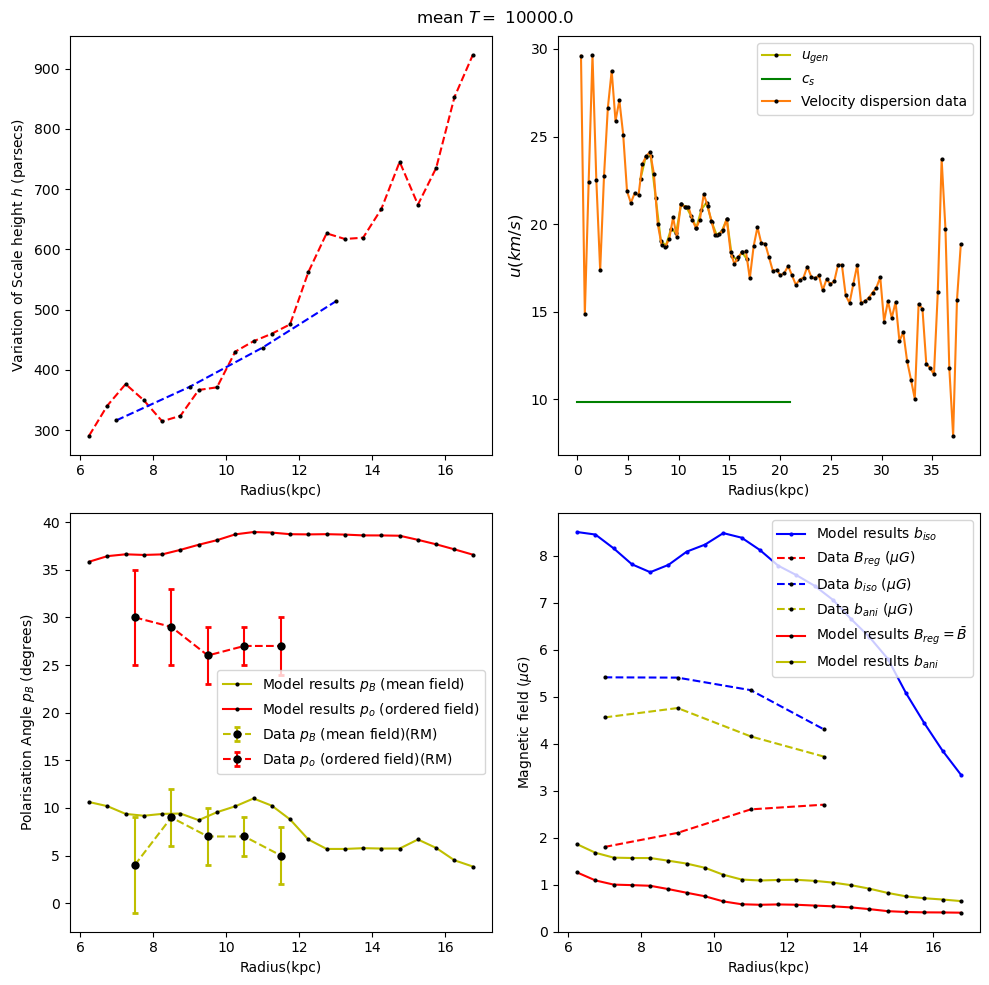

In [231]:
m = 2
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10, 10), tight_layout=True)
i = 0
j = 0
ax[i][j].plot(kpc_r, h_f/pcm,c = 'r',linestyle='--',mfc='k',mec='k',markersize=m, marker='o',label = r'Model results $h(pc)$')
ax[i][j].plot(kpc_dat_r, pc_dat_h,c = 'b',linestyle='--',mfc='k',mec='k',markersize=m, marker='o',label = r'Data from Chamandy et.al.(16) $h(pc)$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'Variation of Scale height $h$ (parsecs)')

j = 1
ax[i][j].plot(kpc_r, u_f/kms,color = 'y', marker='o',mfc='k',mec='k',markersize=m, label = r'$u_{gen}$')
ax[i][j].plot(exp_analytical_data(cs, ca, rk, data_pass)/kms, color = 'g', linestyle = '-', label = r'$c_s$')
ax[i][j].plot(kpc_radius, kms_dat_v, marker='o',markersize=m,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'$u(km/s)$', size='large')
ax[i][j].legend()

i = 1
ax[i][j].plot(kpc_r, biso_f*1e+6,c = 'b',linestyle='-', marker='o',markersize=m,label = r'Model results $b_{iso}$')

ax[i][j].plot(kpc_dat_r, G_dat_Breg, c = 'r',linestyle='--', marker='o',mfc='k',mec='k',markersize=m, label = r'Data $B_{reg}$ ($\mu G$)')
ax[i][j].plot(kpc_dat_r, np.sqrt(G_dat_Btot**2 - G_dat_Bord**2), c = 'b',mfc='k',mec='k',markersize=m,linestyle='--', marker='o', label = r'Data $b_{iso}$ ($\mu G$)')
ax[i][j].plot(kpc_dat_r, np.sqrt(G_dat_Bord**2 - G_dat_Breg**2), c = 'y',mfc='k',mec='k',markersize=m,linestyle='--', marker='o', label = r'Data $b_{ani}$ ($\mu G$)')
ax[i][j].plot(kpc_r, Bbar_f*1e+6,c = 'r',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $B_{reg} = \bar{B}$')
ax[i][j].plot(kpc_r, bani_f*1e+6,c = 'y',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $b_{ani}$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('Magnetic field ($\mu G$)')
ax[i][j].legend()

j = 0
pB = np.arctan(-tanpB_f)
pbb = np.arctan(tanpb_f)
pbo = (1/2)*((1+(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) + bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) + bani_f*np.cos(pbb)))
             +(1-(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) - bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) - bani_f*np.cos(pbb))))

#ax[i][j].errorbar(mrange, 180*M_dat_pb/np.pi, yerr = 180*err_M_dat_pb/np.pi, ms=4, mew=2, capsize=2, c = 'b',linestyle='--', marker='o',mfc='k',mec='k', label = r'Data $p_{B}$ (mean field)(M)', alpha = 0.5)
ax[i][j].errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr = 180*err_RM_dat_pb/np.pi, ms=4, mew=2, capsize=2,c = 'y',linestyle='--', marker='o',mfc='k',mec='k', label = r'Data $p_{B}$ (mean field)(RM)')
ax[i][j].errorbar(rmrange, 180*RM_dat_po/np.pi, yerr = 180*err_RM_dat_po/np.pi, ms=4, mew=2, capsize=2,c = 'r',linestyle='--', marker='o',mfc='k',mec='k', label = r'Data $p_{o}$ (ordered field)(RM)')

ax[i][j].plot(kpc_r, 180*pB/np.pi,c = 'y',linestyle='-', marker='o',markersize=m,mfc='k',mec='k',label = r'Model results $p_{B}$ (mean field)')
#ax[i][j].plot(kpc_r, 180*pbb/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{b}$ (anisotropic field)')
ax[i][j].plot(kpc_r, 180*pbo/np.pi,c = 'r',linestyle='-',mfc='k',markersize=m,mec='k', marker='o',label = r'Model results $p_{o}$ (ordered field)')

ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('Polarisation Angle $p_{B}$ (degrees)')
ax[i][j].legend()
fig.suptitle(r'mean $T = $ '+str(t.mean()))
#plt.savefig('u3sigma_ca_'+str(ca)+'rk_'+str(rk)+ 't_'+str(t.mean())+'z_'+str(z[0])+'psi_'+str(p[0])+'f_'+str(f)+'.png')


In [232]:
Bbar_f

array([1.25673837e-06, 1.08774827e-06, 9.98480594e-07, 9.87302850e-07,
       9.73659670e-07, 9.02295571e-07, 8.24759918e-07, 7.49467266e-07,
       6.40974737e-07, 5.80478585e-07, 5.69189724e-07, 5.76313713e-07,
       5.69479621e-07, 5.52508756e-07, 5.36014470e-07, 5.12639099e-07,
       4.76341453e-07, 4.33289014e-07, 4.15372312e-07, 4.07900108e-07,
       4.05823291e-07, 4.00708144e-07])

In [233]:
kms_sigmaLOS = np.array([17.10, 8.58, 12.94, 17.12, 12.99, 10.03, 13.13, 15.38, 16.60, 14.95, 15.63, 14.50, 12.63, 12.25, 12.57, 12.51, 13.53, 13.79, 13.93, 13.21, 11.56, 10.87, 10.81, 11.06, 11.77, 11.12, 12.21, 12.12, 12.12, 11.70, 11.41, 11.70, 12.54, 12.15, 11.65, 11.18, 11.21, 11.36, 11.72, 10.62, 10.23, 10.47, 10.62, 10.65, 9.76, 10.82, 11.45, 10.92, 10.91, 10.46, 10.01, 10.04, 9.86, 9.94, 10.17, 9.86, 9.55, 9.72, 9.79, 10.15, 9.82, 9.76, 9.86, 9.37, 9.73, 9.58, 9.66, 10.21, 10.21, 9.20, 8.95, 9.59, 10.20, 8.94, 9.01, 9.12, 9.29, 9.46, 9.80, 8.34, 9.01, 8.46, 8.98, 7.70, 7.99, 7.04, 6.43, 5.80, 8.92, 8.76, 6.95, 6.81, 6.60, 9.30, 13.69, 11.38, 6.81, 4.58, 9.05, 10.89])
arcsec_r = np.array([100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0, 8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0, 8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0, 9700.0, 9800.0, 9900.0, 10000.0])

kpc_gal_dist = 780e0 #from Beck et al 
kpc_radius = kpc_gal_dist*np.pi/(180*(60*60))*arcsec_r
kms_dat_v = np.sqrt(3)*kms_sigmaLOS

Text(0, 0.5, 'Variation of Scale height $h$ (parsecs)')

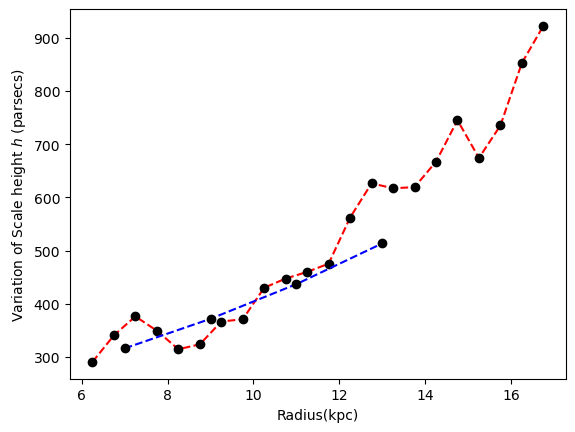

In [234]:
plt.plot(kpc_r, h_f/pcm,c = 'r',linestyle='--',mfc='k',mec='k', marker='o',label = r'Model results $h(pc)$')
plt.plot(kpc_dat_r, pc_dat_h,c = 'b',linestyle='--',mfc='k',mec='k', marker='o',label = r'Data from Chamandy et.al.(16) $h(pc)$')
plt.xlabel('Radius(kpc)')
plt.ylabel(r'Variation of Scale height $h$ (parsecs)')


In [235]:
# arcmin_r_Kam = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96])

# kms_sigmaLOS_Kam = np.array([10.7, 9.5, 9.3, 9.6, 10.0, 10.1, 9.1, 8.2, 8.0, 8.4, 7.9, 8.0, 7.6, 7.6, 8.0, 8.9, 9.8, 10.2, 10.3, 10.5, 9.5, 8.8, 9.1, 9.0, 8.5, 8.2, 8.3, 7.6, 7.7, 6.8, 7.4, 7.5, 6.7, 6.6, 6.4, 8.0, 8.2, 6.5, 6.5, 7.4, 6.5, 5.6, 6.1, 5.7, 5.7, 5.6, 6.4, 7.5])

# kpc_radius = arcmin_r_Kam*(np.pi/(180*60))*840e0 

# kms_dat_v = np.sqrt(3)*kms_sigmaLOS_Kam


In [236]:
from matplotlib import style
style.use('default')

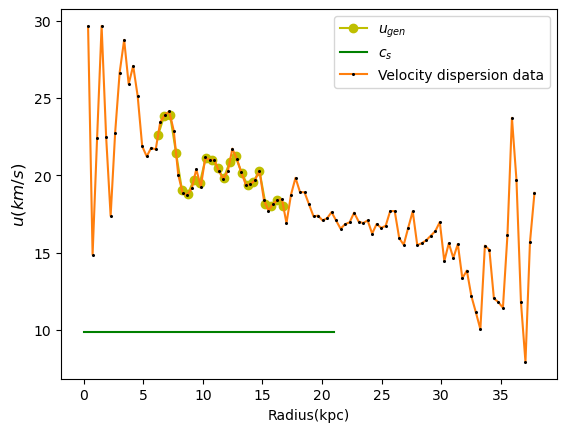

In [237]:
plt.plot(kpc_r, u_f/kms,color = 'y', marker='o', label = r'$u_{gen}$')

plt.plot(exp_analytical_data(cs, ca, rk, data_pass)/kms, color = 'g', linestyle = '-', label = r'$c_s$')
plt.plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
plt.xlabel('Radius(kpc)')
plt.ylabel(r'$u(km/s)$', size='large')
plt.legend()

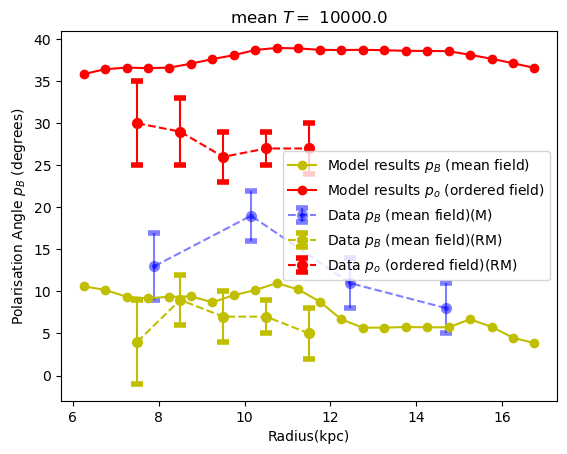

In [238]:
pB = np.arctan(-tanpB_f)
pbb = np.arctan(tanpb_f)
pbo = (1/2)*((1+(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) + bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) + bani_f*np.cos(pbb)))
             +(1-(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) - bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) - bani_f*np.cos(pbb))))

i = 0
plt.errorbar(mrange, 180*M_dat_pb/np.pi, yerr = 180*err_M_dat_pb/np.pi, ms=4, mew=4, capsize=4, c = 'b',linestyle='--', marker='o', label = r'Data $p_{B}$ (mean field)(M)', alpha = 0.5)
plt.errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr = 180*err_RM_dat_pb/np.pi, ms=4, mew=4, capsize=4,c = 'y',linestyle='--', marker='o', label = r'Data $p_{B}$ (mean field)(RM)')
plt.errorbar(rmrange, 180*RM_dat_po/np.pi, yerr = 180*err_RM_dat_po/np.pi, ms=4, mew=4, capsize=4,c = 'r',linestyle='--', marker='o', label = r'Data $p_{o}$ (ordered field)(RM)')

plt.plot(kpc_r, 180*pB/np.pi,c = 'y',linestyle='-', marker='o',label = r'Model results $p_{B}$ (mean field)')
#plt.plot(kpc_r, 180*pbb/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{b}$ (anisotropic field)')
plt.plot(kpc_r, 180*pbo/np.pi,c = 'r',linestyle='-', marker='o',label = r'Model results $p_{o}$ (ordered field)')

plt.title(r'mean $T = $ '+str(t.mean()))
plt.xlabel('Radius(kpc)')
plt.ylabel('Polarisation Angle $p_{B}$ (degrees)')
plt.legend()

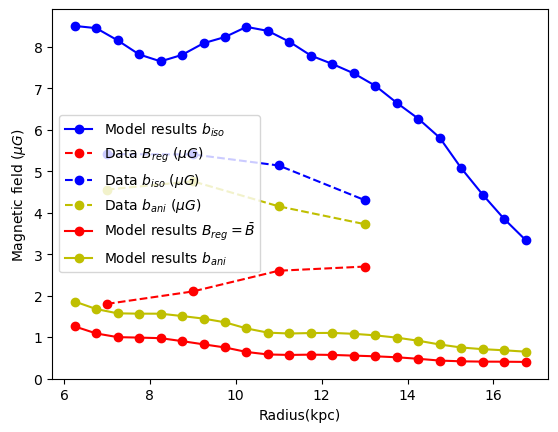

In [239]:
plt.plot(kpc_r, biso_f*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $b_{iso}$')

plt.plot(kpc_dat_r, G_dat_Breg, c = 'r',linestyle='--', marker='o', label = r'Data $B_{reg}$ ($\mu G$)')
plt.plot(kpc_dat_r, np.sqrt(G_dat_Btot**2 - G_dat_Bord**2), c = 'b',linestyle='--', marker='o', label = r'Data $b_{iso}$ ($\mu G$)')
plt.plot(kpc_dat_r, np.sqrt(G_dat_Bord**2 - G_dat_Breg**2), c = 'y',linestyle='--', marker='o', label = r'Data $b_{ani}$ ($\mu G$)')



plt.plot(kpc_r, Bbar_f*1e+6,c = 'r',linestyle='-', marker='o',label = r'Model results $B_{reg} = \bar{B}$')

plt.plot(kpc_r, bani_f*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $b_{ani}$')
plt.xlabel('Radius(kpc)')
plt.ylabel('Magnetic field ($\mu G$)')
plt.legend()

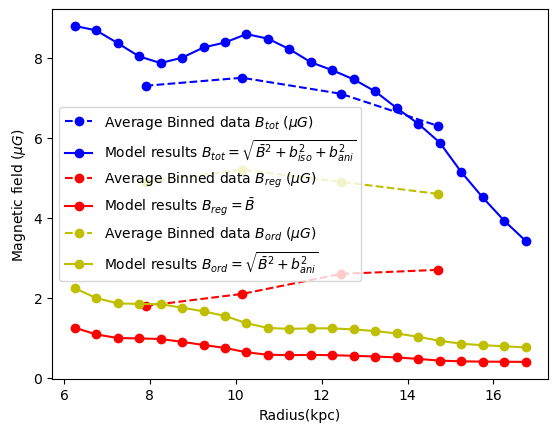

In [240]:
G_scal_Bbartot = np.sqrt(biso_f**2 + bani_f**2 + Bbar_f**2)
G_scal_Bbarreg = Bbar_f
G_scal_Bbarord = np.sqrt(bani_f**2 + Bbar_f**2)
plt.plot(mrange, G_dat_Btot, c = 'b',linestyle='--', marker='o', label = 'Average Binned data $B_{tot}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbartot*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $B_{tot}=\sqrt{\bar{B}^2+b_{iso}^2+b_{ani}^2}$')

plt.plot(mrange, G_dat_Breg, c = 'r',linestyle='--', marker='o', label = 'Average Binned data $B_{reg}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbarreg*1e+6,c = 'r',linestyle='-', marker='o',label = r'Model results $B_{reg} = \bar{B}$')

plt.plot(mrange, G_dat_Bord, c = 'y',linestyle='--', marker='o', label = 'Average Binned data $B_{ord}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbarord*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $B_{ord} = \sqrt{\bar{B}^2+b_{ani}^2}$')

plt.xlabel('Radius(kpc)')
plt.ylabel('Magnetic field ($\mu G$)')
plt.legend()